In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-insurance-claim-prediction-dataset/insurance2.csv
/kaggle/input/sample-insurance-claim-prediction-dataset/insurance3r2.csv


In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing dataset
df = pd.read_csv('../input/sample-insurance-claim-prediction-dataset/insurance3r2.csv')
df1 =  pd.read_csv('../input/sample-insurance-claim-prediction-dataset/insurance2.csv')

In [4]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [5]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


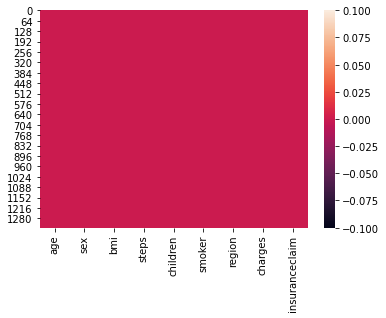

In [6]:
#Checking for null values
sns.heatmap(df.isnull())

In [7]:
df.shape

(1338, 9)

In [8]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
steps               int64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [10]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

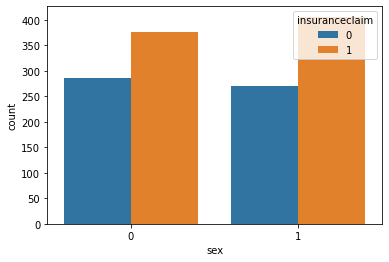

In [11]:
sns.countplot(x='sex',hue='insuranceclaim',data=df)

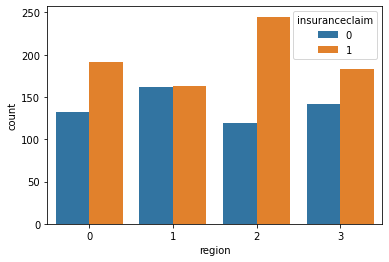

In [12]:
sns.countplot(x='region',hue='insuranceclaim',data=df)

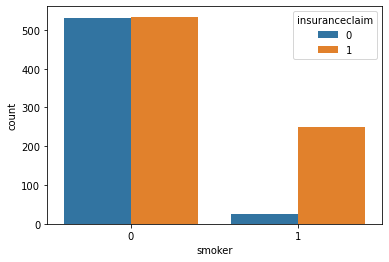

In [13]:
sns.countplot(x='smoker',hue='insuranceclaim',data=df)

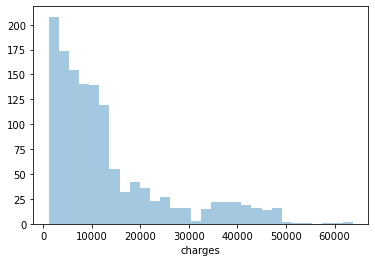

In [14]:
x = df['charges']
sns.distplot(x,kde=False)

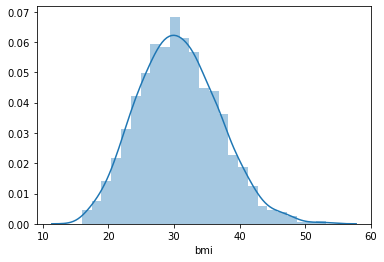

In [15]:
x = df['bmi']
sns.distplot(x)

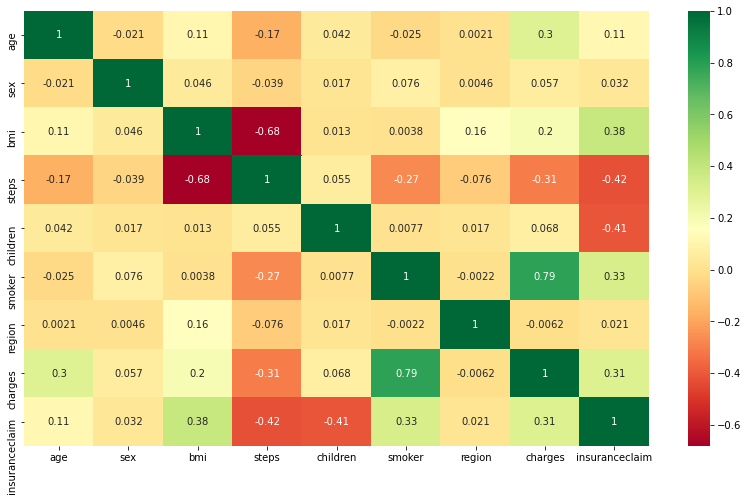

In [16]:
#Plotting correlation
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(14,8))
#To plot heatmap
import seaborn as sns
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [18]:
#Assigning labels
X = df.iloc[ :, :8]
y = df.iloc[:, -1:]

In [19]:
X.head()

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [20]:
y.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [21]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

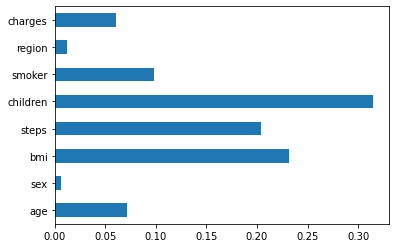

In [22]:
##To plot feature importances
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.plot(kind='barh')

In [23]:
#Assigning training and testing value
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
#Performing scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler=sc.fit(X)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

Accuracy ::  0.9664179104477612
Precision ::  0.9634146341463414


[Text(33.0, 0.5, 'true'), Text(0.5, 15.0, 'predict')]

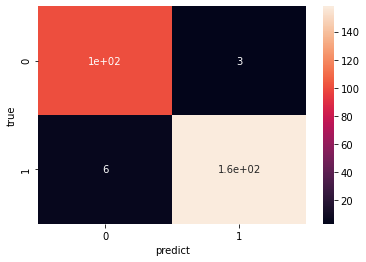

In [25]:
#Using RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=1700,random_state=5)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

from sklearn import metrics
print('Accuracy :: ',metrics.accuracy_score(y_test,predict))
print('Precision :: ',metrics.precision_score(y_test,predict))
from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')

In [ ]:
#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='log2')

param_grid = {
    'n_estimators' : [50,1000],
    'max_depth': [1,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,1000]
}


CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print (CV_rfc.best_params_)

Accuracy ::  0.996268656716418
Precision ::  0.9931506849315068


[Text(33.0, 0.5, 'true'), Text(0.5, 15.0, 'predict')]

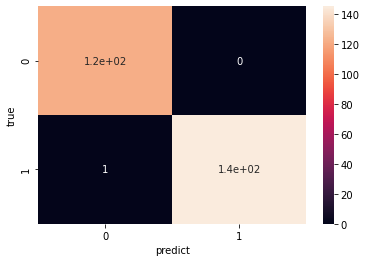

In [74]:
#Using RandomForestClassifier model using the tuned parameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,max_depth=100,random_state=1000,max_features='log2')
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

from sklearn import metrics
print('Accuracy :: ',metrics.accuracy_score(y_test,predict))
print('Precision :: ',metrics.precision_score(y_test,predict))
from sklearn.metrics import accuracy_score,confusion_matrix
Rf_cm = confusion_matrix(predict,y_test)
ax = sns.heatmap(Rf_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')